### This script is designed to take an input of location of a beacon in X and Y coordinates and bin size of historgram. It knows already the size of the arena and will produce a histogram/ matrix of numbers for occupancy/area per each bin.


In [20]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.patches as patches
from PIL import Image
import matplotlib.image as mpimg
import pandas as pd
import math
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/'

### TODO: 
    1. Figure out making normalization without saving picture each time.  
    2. For each change of beacon make a histogram and multiply by given normalization 
    3. Make large array to produce for histogram making

### 1. input arena size

In [3]:
cut = 0 # keeping the cut where rectangle of arena ends
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
print("area %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min))) 

area 1.1431 M*2


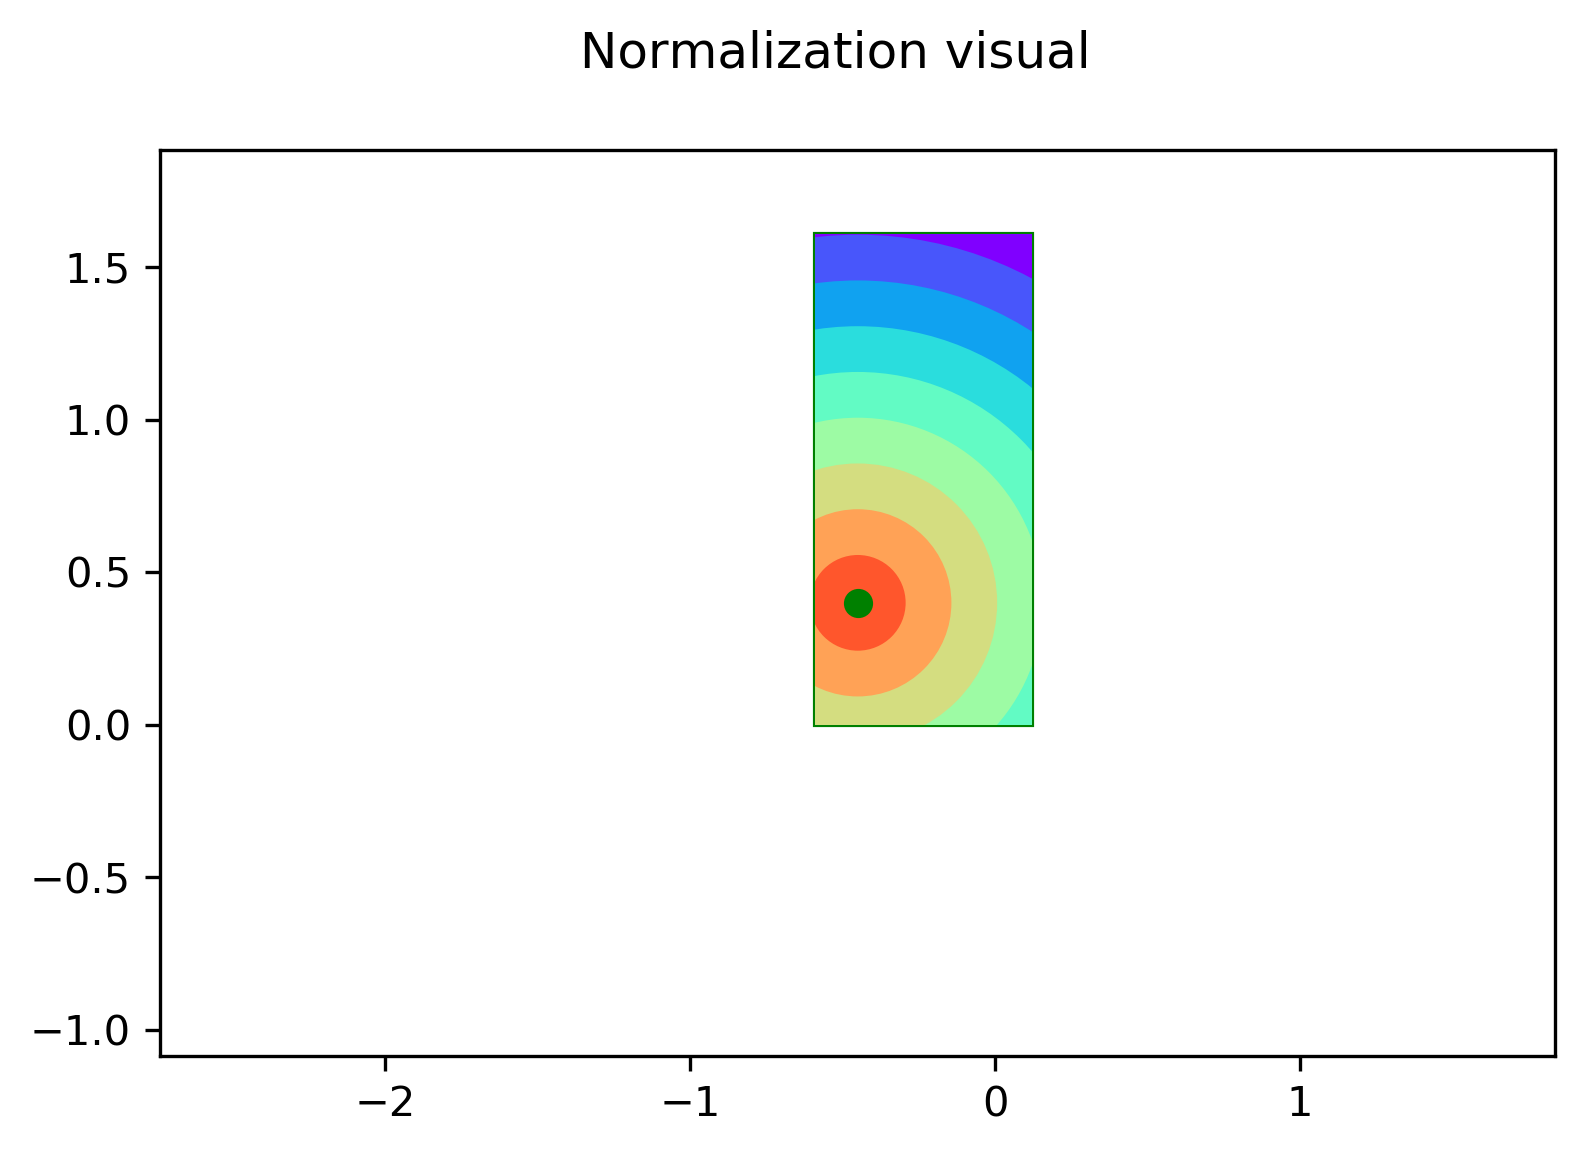

In [4]:

fig, ax1 = plt.subplots(1, 1, sharex=True,dpi=300, sharey=True)
fig.suptitle("Normalization visual")
ax1.plot(-.45,.4,"go")
rectangle = patches.Rectangle((-.59,0), .71,1.61, color="green")
ax1.add_patch(rectangle)
color=iter(plt.cm.rainbow(np.linspace(0,1,10)))
for i in reversed(range(10)):
    c=next(color)
    patch = patches.Circle((-.45,.4), radius=.15*i,color=c)
    ax1.add_patch(patch)
    patch.set_clip_path(rectangle)                  
ax1.axis("equal") 
plt.show()

## 2. Now define the area of circles mathematically 

## a. get area of each circle withouth subtracting rectangle 

## Tried mathematical approach on paper but there were at least 4 other combination for which it would have to be calculated.So it is possible but would take too long to write the code hence decided to use the pictures that can be generated and estimated the pixels using different grayscale values 

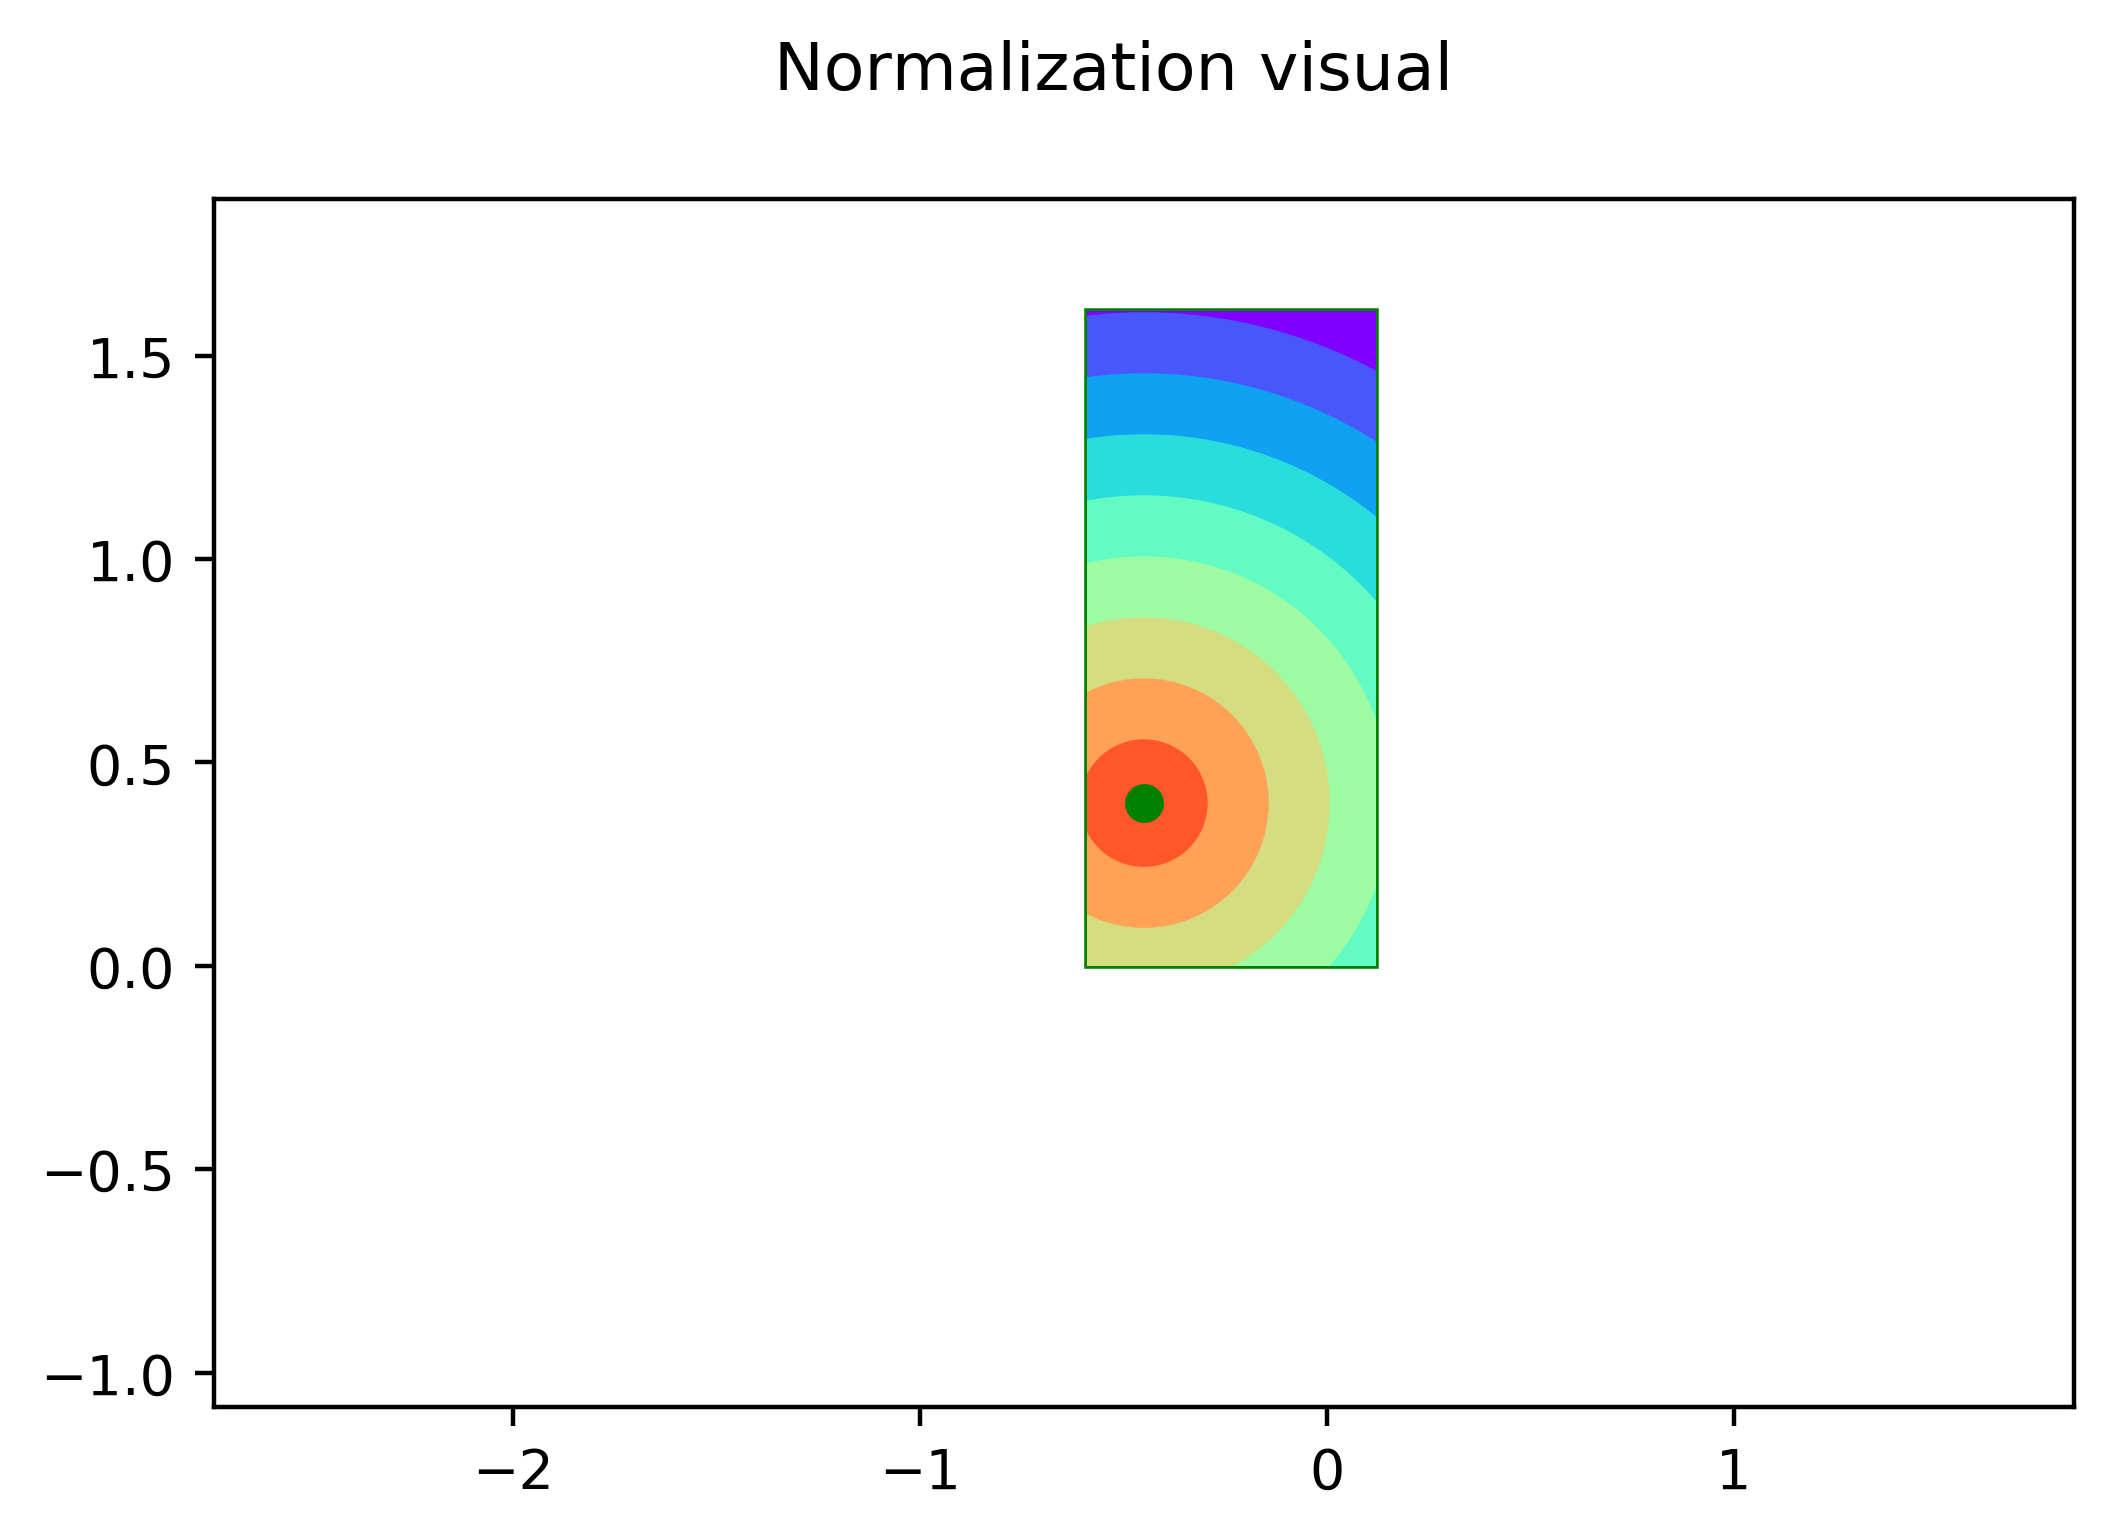

In [13]:

def visualization(center=(-.45,.4),X_cut_min = -.59,Y_cut_max = 1.61,X_cut_max = .12,Y_cut_min = .00 ):
    """Makes a visual represetation of a banded rectangle with circles. to be exported and then can be counted""" 
    fig, ax1 = plt.subplots(1, 1, sharex=True,dpi=400,)
    fig.suptitle("Normalization visual")
    ax1.plot(center[0],center[1],"go")
    rectangle = patches.Rectangle((X_cut_min,Y_cut_min), (abs(X_cut_min)+abs(X_cut_max)),Y_cut_max , color="green")
    ax1.add_patch(rectangle)
    color=iter(plt.cm.rainbow(np.linspace(0,1,10)))
    for i in reversed(range(10)):
        c=next(color)
        patch = patches.Circle((center[0],center[1]), radius=.15*i,color=c)
        ax1.add_patch(patch)
        patch.set_clip_path(rectangle)                  
    ax1.axis("equal") 
    return plt.show()
    
visualization()


In [184]:
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img


In [213]:
k=np.linspace(0,.99,20)
k

array([0.        , 0.05210526, 0.10421053, 0.15631579, 0.20842105,
       0.26052632, 0.31263158, 0.36473684, 0.41684211, 0.46894737,
       0.52105263, 0.57315789, 0.62526316, 0.67736842, 0.72947368,
       0.78157895, 0.83368421, 0.88578947, 0.93789474, 0.99      ])

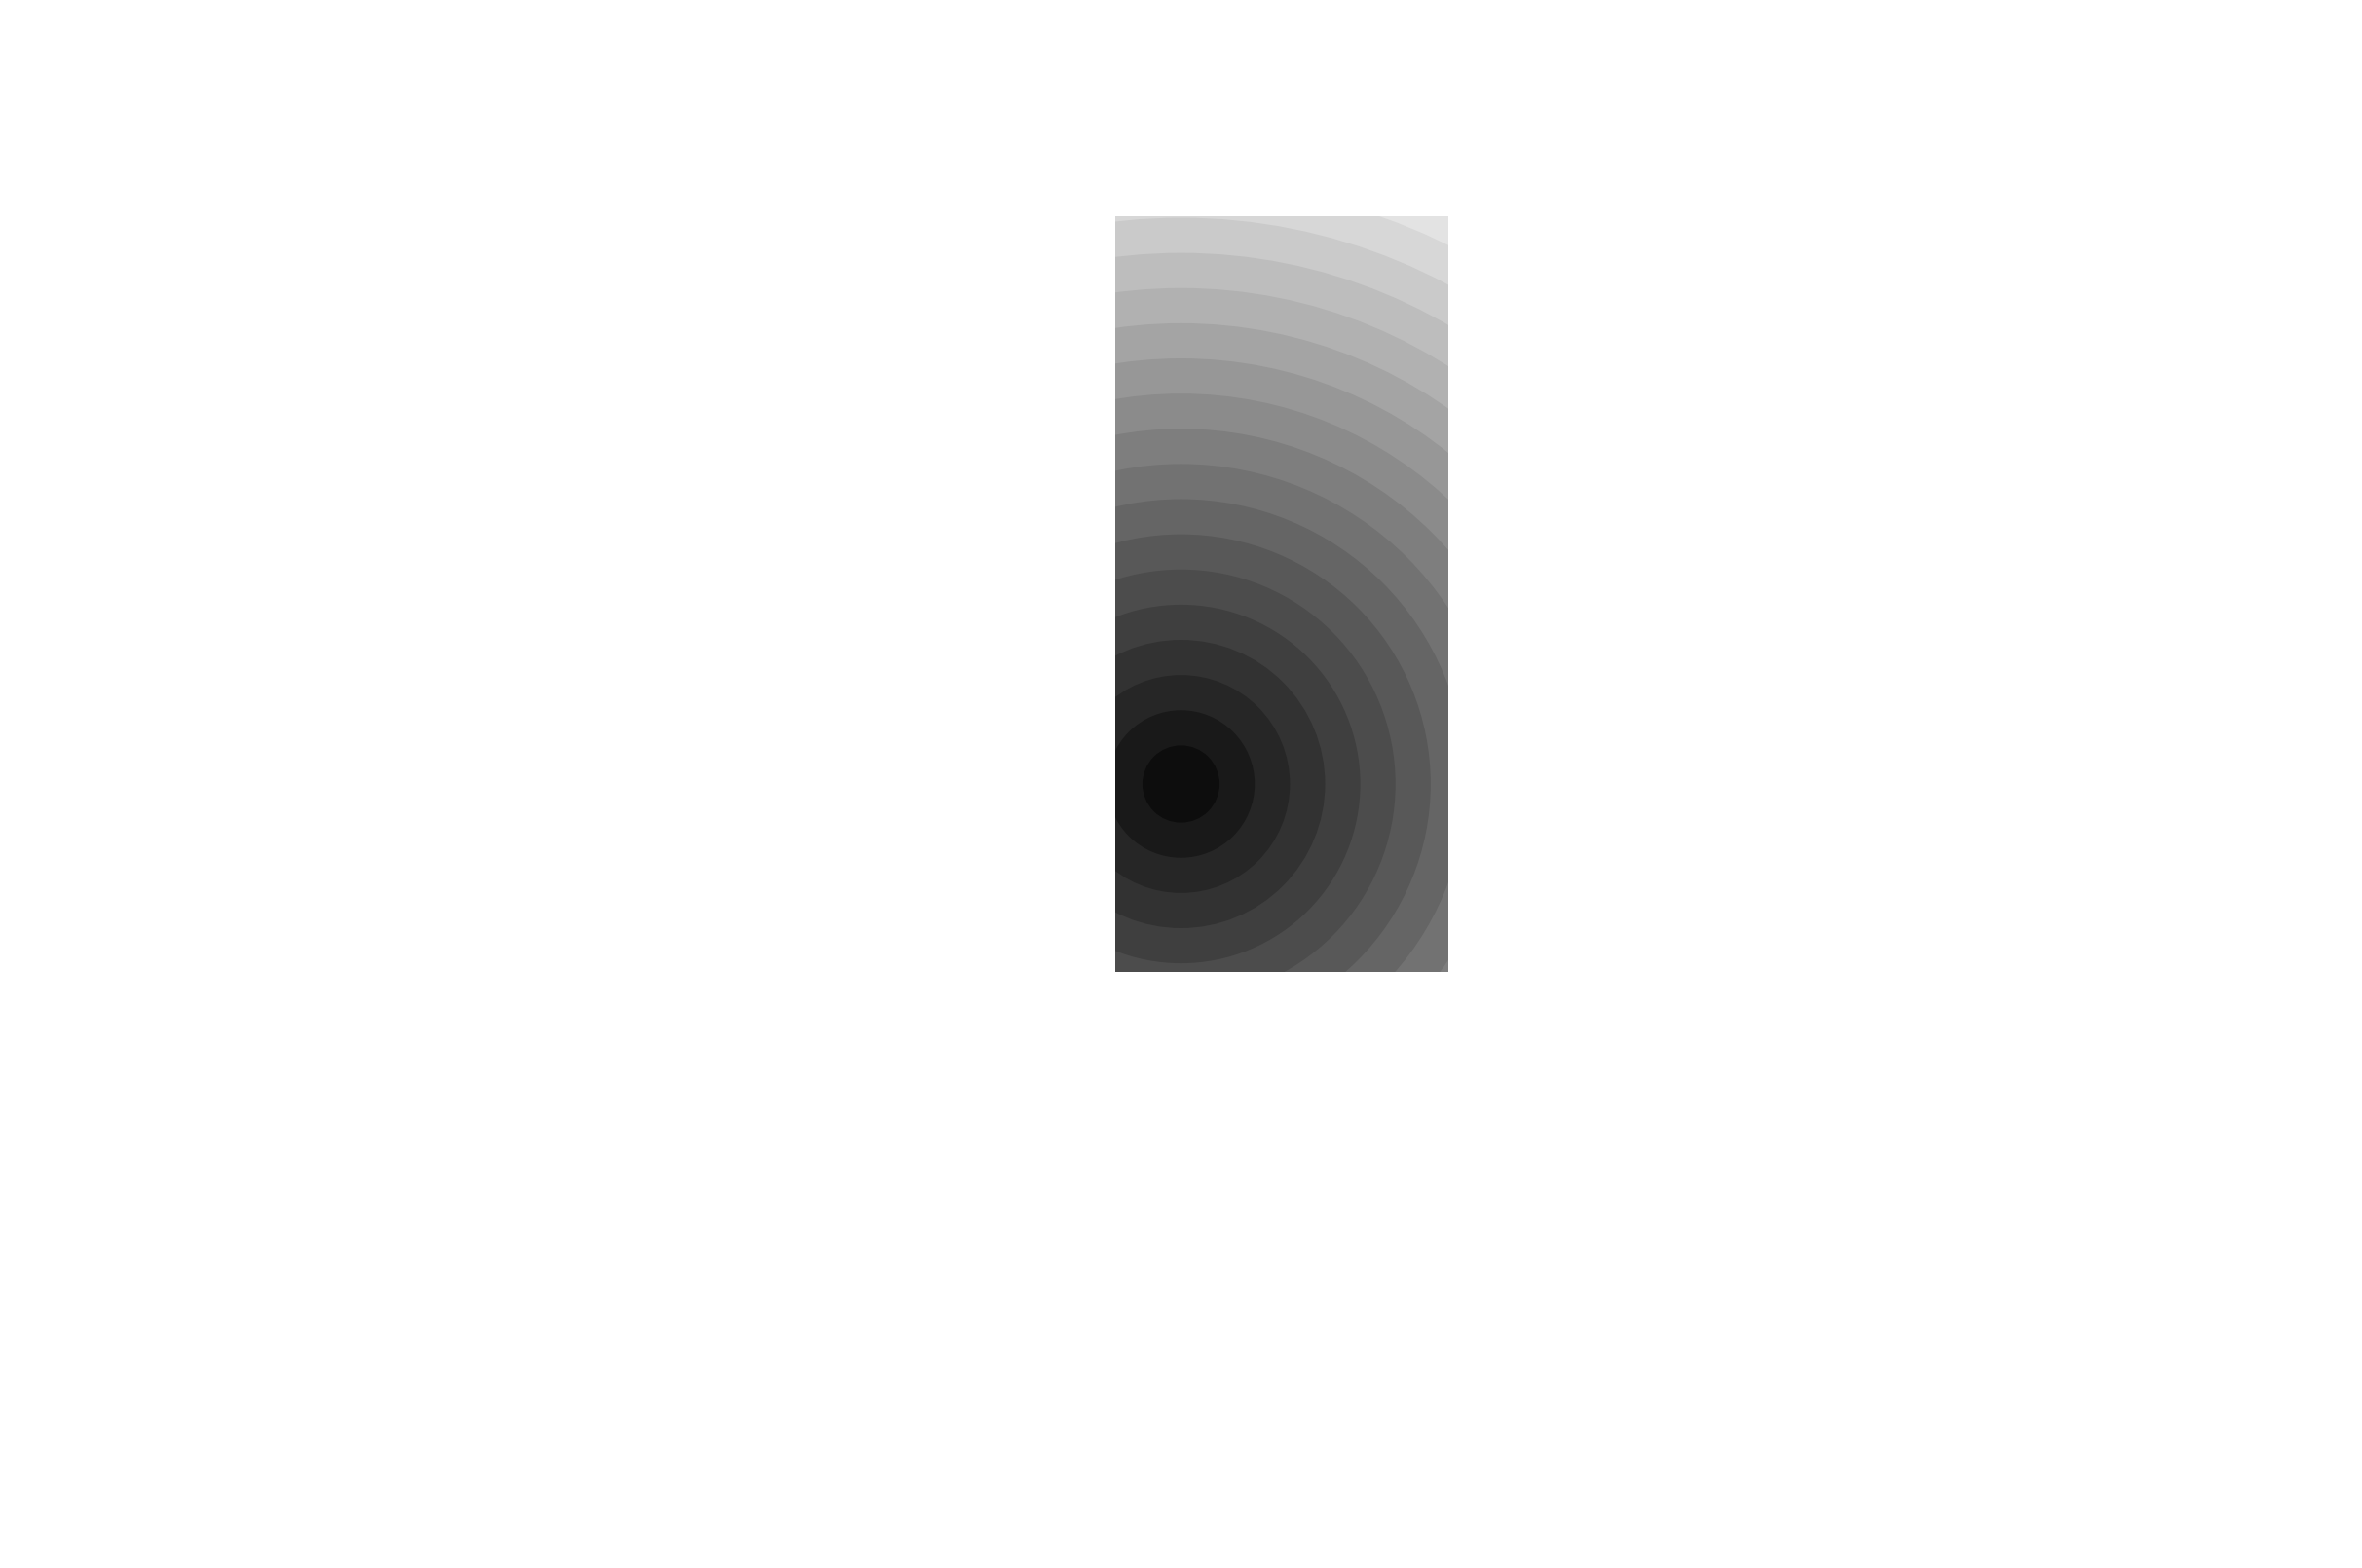

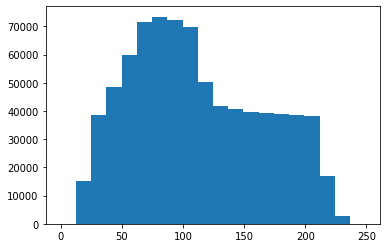

In [224]:

def visualization_grey(center=(-.45,.4),dpi=500,X_cut_min = -.59,Y_cut_max = 1.61,X_cut_max = .12,Y_cut_min = .00,bands=20 ):
    """Makes a visual represetation of a banded rectangle with circles. to be exported and then can be counted""" 
    fig, ax1 = plt.subplots(1, 1, sharex=True,dpi=dpi,)
    fig.patch.set_visible(False)
    #fig.suptitle("Normalization visual")
    #ax1.plot(center[0],center[1],"go")
    rectangle = patches.Rectangle((X_cut_min,Y_cut_min), (abs(X_cut_min)+abs(X_cut_max)),Y_cut_max , color="white")
    ax1.add_patch(rectangle)
    #color=iter(plt.cm.binary(np.linspace(0,.99,bands+1)))
    color = np.linspace(0,.99,bands+1)
    #BoundaryNorm((1,249), 20 [, clip, extend])
    for i in reversed(range(20)):
        c=color[i]
        #print(color[i])
        #print(str(c))
        patch = patches.Circle((center[0],center[1]), radius=.075*i,color=str(c))
        ax1.add_patch(patch)
        patch.set_clip_path(rectangle)                  
    ax1.axis("equal")
    ax1.axis("off")
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    fig.savefig(figures + 'norm_graph.png', dpi=dpi, transparent=True)
    #ax[0][0].imshow()
    #img = fig2img(fig)
    img= Image.frombytes('RGB',fig.canvas.get_width_height(),fig.canvas.tostring_rgb())
    image_array = np.asarray(img)
    #binning= np.bincount(image_array.ravel())
    #print(binning)
    hist, bins = np.histogram(image_array,bins=bands,range=(0,249))
    plt.show()
    plt.hist(image_array.ravel(), bins=bands, range=(0,249))
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()
    
    
    return hist,bins #img
    
hist,bins = visualization_grey()

In [226]:
hist,bins/249

(array([    0, 15228, 38400, 48558, 59784, 71463, 73410, 72069, 69825,
        50181, 41748, 40623, 39678, 39285, 38904, 38676, 38325, 17100,
         2919,     0], dtype=int64),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))

In [233]:
norm= []
int(sum(hist))
for count in counts: 
    k= count/int(sum(counts))
    norm.append(k)
len(norm),len(bins)

(18, 21)

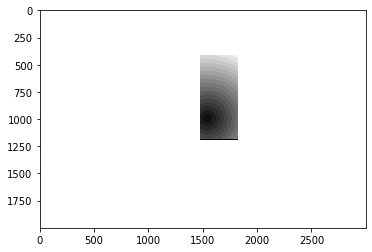

In [162]:
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

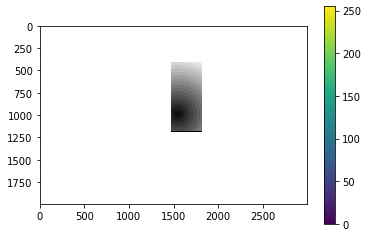

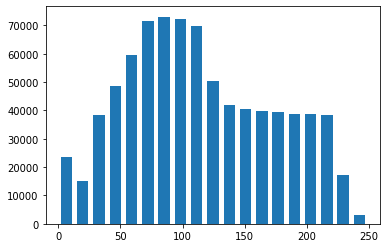

(array([23625, 15042, 38250, 48510, 59700, 71706, 73059, 72312, 69879,
        50361, 41847, 40467, 39768, 39273, 38886, 38709, 38304, 17157,
         2946], dtype=int64),
 array([ 0.        ,  0.68975069,  1.37950139,  2.06925208,  2.75900277,
         3.44875346,  4.13850416,  4.82825485,  5.51800554,  6.20775623,
         6.89750693,  7.58725762,  8.27700831,  8.966759  ,  9.6565097 ,
        10.34626039, 11.03601108, 11.72576177, 12.41551247, 13.10526316]))

In [163]:

plt.imshow(image_array)
plt.colorbar()
plt.show()
np.histogram(image_array)
hist, bins = np.histogram(image_array,bins=19,range=(0,249))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
hist,bins/19


(array([ 8496.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18765., 29742., 37479., 39354., 38961., 38682., 38484.,
        17217.,  2946.]),
 array([  0.        ,  13.83333333,  27.66666667,  41.5       ,
         55.33333333,  69.16666667,  83.        ,  96.83333333,
        110.66666667, 124.5       , 138.33333333, 152.16666667,
        166.        , 179.83333333, 193.66666667, 207.5       ,
        221.33333333, 235.16666667, 249.        ]),
 <a list of 18 Patch objects>)

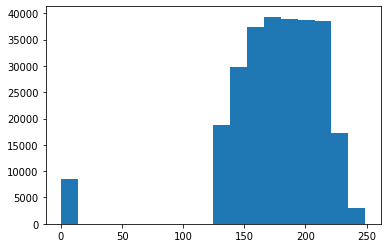

In [152]:
#plt.hist(image_array[:,:,0])
plt.hist(image_array.ravel(), bins=18, range=(0,249))

[0.70704898 0.51556676 0.98163911 0.69440134 0.61241857 0.57552785
 0.38568101 0.98450865 0.46926678 0.44291419 0.32038019 0.72895428
 0.26393213 0.78112311 0.74917935 0.54236932 0.11777082 0.33631439
 0.68351926 0.88098517 0.48078846 0.0355109  0.72431803 0.52228346
 0.75731742 0.04872449 0.5865579  0.25457086 0.78144537 0.57375605
 0.10981016 0.78229305 0.07840602 0.85294171 0.31617496 0.25201475
 0.61422847 0.68048864 0.60073131 0.27486759 0.56283327 0.82196977
 0.83492932 0.84553918 0.02327896 0.15583825 0.50644776 0.44558397
 0.07215661 0.72120865 0.10335881 0.44126129 0.91640675 0.41357379
 0.55793389 0.71537823 0.63367758 0.24515181 0.12708231 0.41723234
 0.03725962 0.61970866 0.4326441  0.91912222 0.92759244 0.45718886
 0.97292117 0.67350888 0.00838802 0.0556061  0.75234258 0.29055869
 0.88686847 0.72888406 0.71985157 0.99929451 0.85724396 0.79007041
 0.86759874 0.11940467 0.69381249 0.17970691 0.28217863 0.93976374
 0.39185349 0.75063227 0.66677623 0.83009963 0.02312453 0.1519

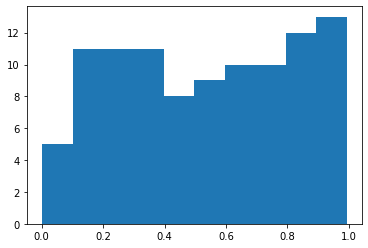

In [61]:
k=np.random.random(100)
plt.hist(np.random.random(100))
print(k)

[7875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4806, 32, 27, 7, 26, 10, 20, 20, 4, 26, 6, 30, 62, 12370, 48, 19, 35, 30, 24, 18, 32, 20, 24, 22, 46, 46, 66, 15660, 51, 61, 28, 32, 36, 36, 20, 48, 26, 60, 38, 90, 19312, 60, 60, 28, 32, 48, 38, 34, 56, 42, 62, 44, 112, 23222, 71, 50, 53, 52, 46, 56, 26, 66, 53, 51, 75, 153, 23636, 57, 48, 58, 43, 43, 33, 54, 57, 42, 54, 66, 126, 23438, 51, 56, 52, 42, 34, 53, 53, 42, 57, 34, 59, 58, 125, 22701, 45, 43, 30, 33, 53, 28, 52, 30, 36, 47, 46, 125, 16256, 40, 31, 21, 43, 35, 30, 27, 29, 31, 26, 38, 95, 13528, 37, 22, 32, 45, 28, 27, 19, 25, 33, 20, 30, 78, 13114, 34, 38, 26, 32, 18, 29, 20, 19, 31, 20, 29, 31, 59, 12897, 39, 24, 30, 24, 23, 28, 22, 30, 20, 22, 36, 64, 12743, 23, 31, 23, 23, 30, 22, 27, 23, 24, 26, 26, 88, 12600, 28, 28, 27, 16, 29, 23, 24, 22, 25, 39, 33, 68, 12514, 22, 24, 25, 28, 21, 26, 23, 29, 51, 21, 24, 59, 12442, 24, 21, 27, 20, 19, 21, 38, 32, 20, 35, 21, 18, 59, 5538, 8, 6, 6, 4, 6, 4, 7, 7, 5, 5, 7, 17, 948, 0, 0, 

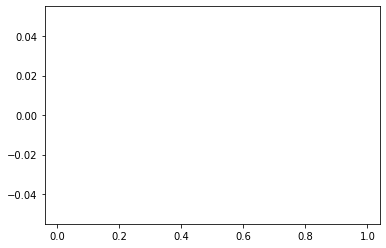

In [62]:
print(img.histogram())
plt.hist(img.histogram(),bins=18, range=(0.01, .99), fc='k', ec='w')

plt.show()

[1. 1. 1. ... 1. 1. 0.]


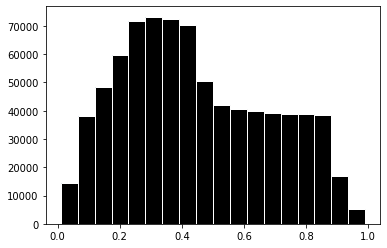

(array([14514., 38025., 48405., 59622., 71592., 73260., 72444., 70158.,
        50460., 41952., 40548., 39861., 39333., 38886., 38772., 38409.,
        17040.,  5155.]),
 array([0.01      , 0.06444445, 0.11888889, 0.17333333, 0.22777778,
        0.2822222 , 0.33666667, 0.3911111 , 0.44555557, 0.5       ,
        0.55444443, 0.60888886, 0.66333336, 0.7177778 , 0.7722222 ,
        0.82666665, 0.8811111 , 0.9355556 , 0.99      ], dtype=float32))

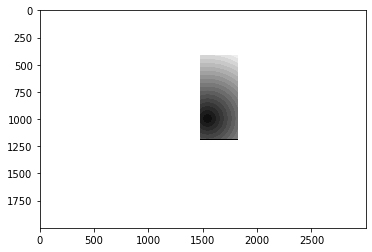

In [69]:
img = mpimg.imread(figures + 'norm_graph.png')
counts, bins, bars = plt.hist(img.ravel(), bins=18, range=(0.01, .99),)
print(img.ravel())
plt.hist(img.ravel(), bins=18, range=(0.01, .99), fc='k', ec='w')
plt.show()
imgplot = plt.imshow(img)
counts,bins


In [43]:
img.histogram()

[7875,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4806,
 32,
 27,
 7,
 26,
 10,
 20,
 20,
 4,
 26,
 6,
 30,
 62,
 12370,
 48,
 19,
 35,
 30,
 24,
 18,
 32,
 20,
 24,
 22,
 46,
 46,
 66,
 15660,
 51,
 61,
 28,
 32,
 36,
 36,
 20,
 48,
 26,
 60,
 38,
 90,
 19312,
 60,
 60,
 28,
 32,
 48,
 38,
 34,
 56,
 42,
 62,
 44,
 112,
 23222,
 71,
 50,
 53,
 52,
 46,
 56,
 26,
 66,
 53,
 51,
 75,
 153,
 23636,
 57,
 48,
 58,
 43,
 43,
 33,
 54,
 57,
 42,
 54,
 66,
 126,
 23438,
 51,
 56,
 52,
 42,
 34,
 53,
 53,
 42,
 57,
 34,
 59,
 58,
 125,
 22701,
 45,
 43,
 30,
 33,
 53,
 28,
 52,
 30,
 36,
 47,
 46,
 125,
 16256,
 40,
 31,
 21,
 43,
 35,
 30,
 27,
 29,
 31,
 26,
 38,
 95,
 13528,
 37,
 22,
 32,
 45,
 28,
 27,
 19,
 25,
 33,
 20,
 30,
 78,
 13114,
 34,
 38,
 26,
 32,
 18,
 29,
 20,
 19,
 31,
 20,
 29,
 31,
 59,
 12897,
 39,
 24,
 30,
 24,
 23,
 28,
 22,
 30,
 20,
 22,
 36,
 64,
 12743,
 23,
 31,
 23,
 23,
 30,
 22,
 27,
 23,
 24,
 26,
 26,
 88,
 12600,
 28,
 28,
 27,
 16,
 29,
 23,

In [10]:
norm= []
int(sum(counts))
for count in counts: 
    k= count/int(sum(counts))
    norm.append(k)
norm

[0.01817803806441593,
 0.04762435561522777,
 0.060624771428142016,
 0.07467348666643288,
 0.08966529565300162,
 0.09175437981253351,
 0.09073238180643158,
 0.0878692844511019,
 0.06319855317145019,
 0.05254272101959331,
 0.05078428327380028,
 0.049923851128957114,
 0.049262558301479395,
 0.04870271380548973,
 0.04855993467228432,
 0.04810529585339338,
 0.021341723068599112,
 0.006456372207665987]

### Now take the counts and multiply the distributions correctly - so make a histogram for each time beacon changes 

In [22]:
FS04=pd.read_excel(processed +'FS04_rears_new.xlsx', index_col=0)
FS04

,Time,RatX,RatY,RatZ,BeaconX,BeaconY,Visibility,time_of_beacon_trigger,Beacon_group,Beacon_subgroup,trial_in_next
0,1.613728e+09,-0.189118,-0.542030,0.621123,-0.161819,-0.528795,1,1.613728e+09,1,1,True
1,1.613729e+09,0.283818,0.797506,0.620336,-0.161819,-0.528795,1,1.613729e+09,1,2,True
2,1.613729e+09,-0.206200,-0.563636,0.625777,-0.161819,-0.528795,1,1.613729e+09,1,2,False
3,1.613729e+09,-0.234257,-0.516903,0.625419,-0.161819,-0.528795,1,1.613729e+09,1,3,True
4,1.613729e+09,-0.359741,0.166368,0.624256,-0.161819,-0.528795,0,1.613729e+09,1,4,True
5,1.613729e+09,-0.219940,-0.517029,0.623251,-0.161819,-0.528795,1,1.613729e+09,1,4,False
6,1.613729e+09,-0.230839,-0.557631,0.623098,-0.161819,-0.528795,1,1.613729e+09,1,5,True
7,1.613729e+09,-0.253960,-0.667017,0.623301,-0.161819,-0.528795,0,1.613729e+09,1,6,True
8,1.613729e+09,-0.086789,-0.797742,0.621373,-0.161819,-0.528795,0,1.613729e+09,1,6,False
9,1.613729e+09,0.248185,-0.770949,0.620643,-0.161819,-0.528795,0,1.613729e+09,1,6,False


(array([2712.,  785.,  402.,  276.,  168.,  126.,  132.,  137.,  188.,
          34.]),
 array([1.30114128e-03, 1.56322350e-01, 3.11343560e-01, 4.66364769e-01,
        6.21385978e-01, 7.76407187e-01, 9.31428396e-01, 1.08644961e+00,
        1.24147081e+00, 1.39649202e+00, 1.55151323e+00]),
 <a list of 10 Patch objects>)

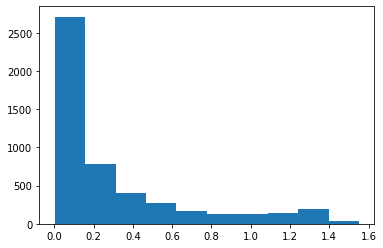

In [12]:

def get_rear_distance_from_beacon(df_rears_corrected):
    dist=[]
    for row in df_rears_corrected.iterrows():
        #print(row[1][1])
        #print(row[1][4])
        #print(row[1][2])
        #print(row[1][5])
        dist.append(math.sqrt((row[1][1] - row[1][4])**2 + (row[1][2] - row[1][5])**2))

    return dist 
plt.hist(get_rear_distance_from_beacon(FS04))

[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35 ]
18
19
[26.15819677 48.76734015 18.6724296   7.8407161   4.48326478  4.12894709
  3.35709813  3.69050995  1.39036817  1.41865347  0.81254853  0.74885777
  1.03451372  0.82794613  0.97119869  1.25073769  1.28050338  0.32927498]
[ 0.78165564  7.28652641 14.0043222  12.24645181 15.42243085 12.75385879
  8.34737913  9.0505363   4.73989149  2.62713605  2.58999845  2.346421
  1.52713931  2.38643298  2.03951726  1.44315888  0.59756825  0.31636224]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

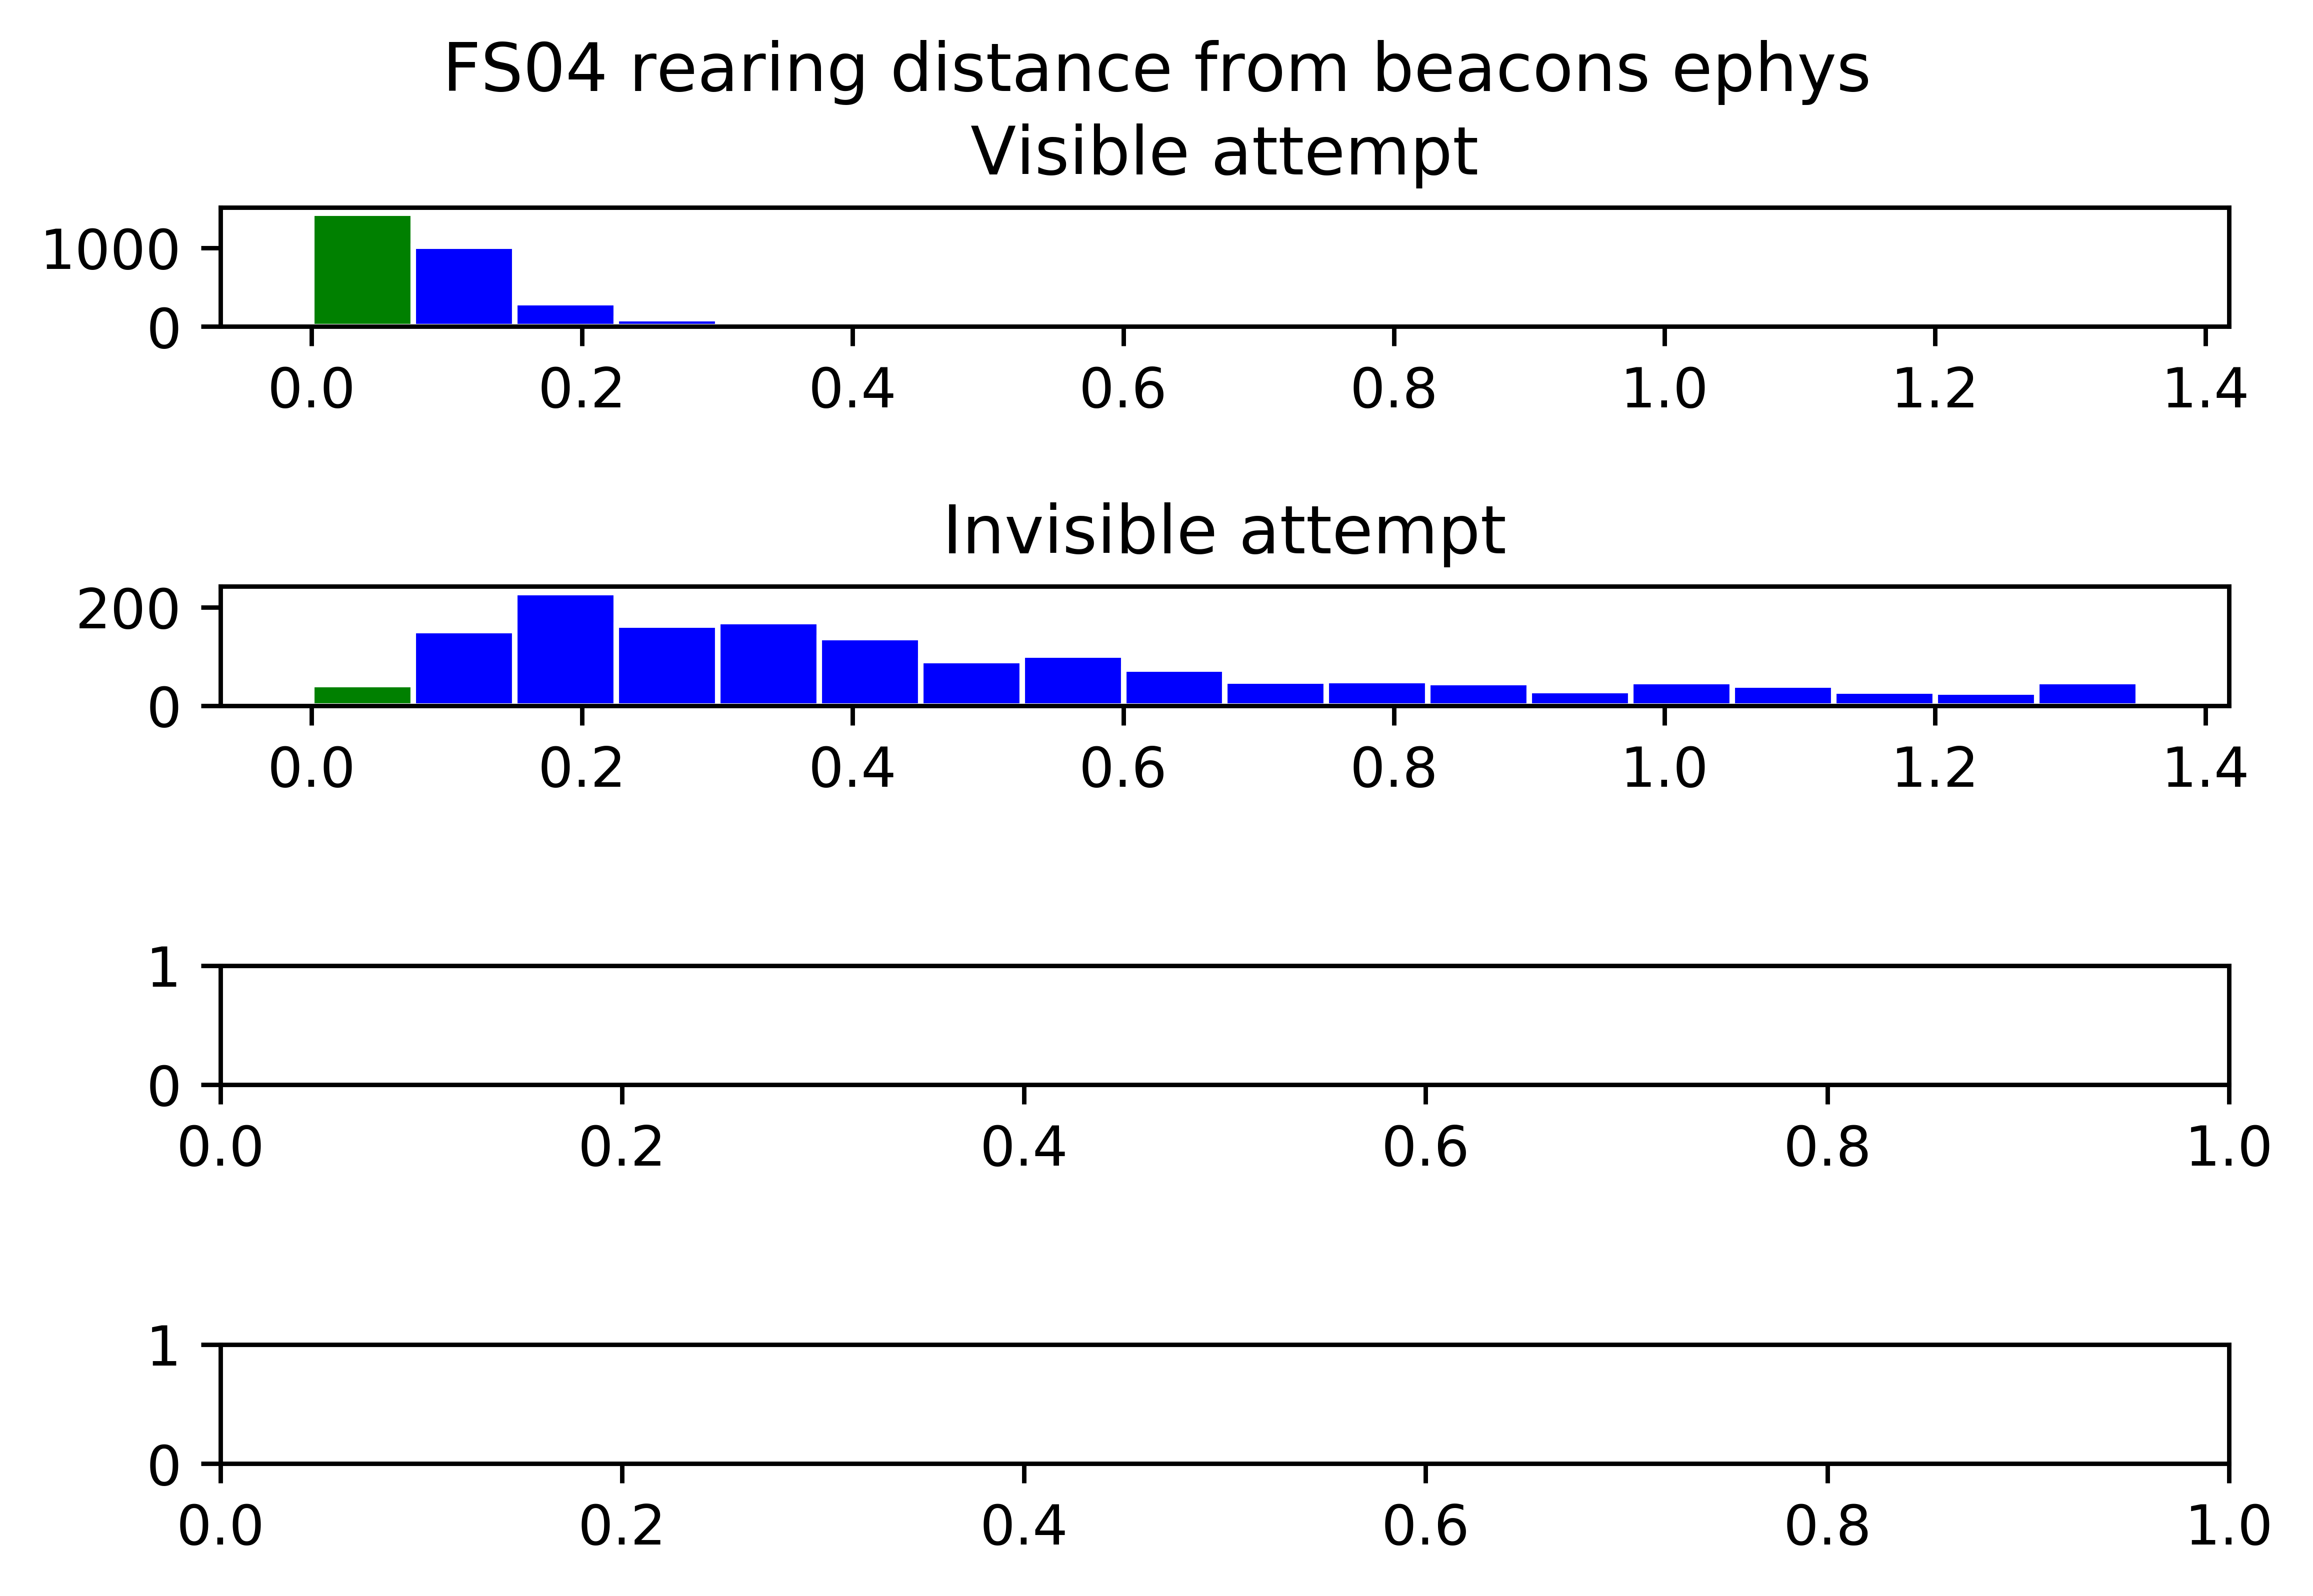

In [25]:
def make_simple_graphs (animal_ID,rearing):
    binwidth=.075
    plt.tight_layout
    bins = np.arange(0, 1.425, binwidth)
    interval=bins
    print(bins)
    bins[1]= 0.075
    fig, ax = plt.subplots(4,dpi=800,sharex=False)
    fig.suptitle(animal_ID +' rearing distance from beacons ephys',y=1)

    N, bins, patches=ax[0].hist(get_rear_distance_from_beacon(rearing.loc[rearing['Visibility']==1]),bins=bins,ec='w')
    
    print(len(norm))
    print(len(bins))
    print(N*norm)
    
    ax[0].set_title('Visible attempt')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
        
    N1, bins, patches=ax[1].hist(get_rear_distance_from_beacon(rearing.loc[rearing['Visibility']==0]),bins=bins,ec='w')
    print(N1*norm)
    ax[1].set_title('Invisible attempt')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    
    patches = ax[2].bar(interval, N*norm)
    ax[2].set_title('Visible attempt Normalized')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    
    
    number, bins, patches = ax[3].hist((N1*norm),bins=bins,ec='w')
    ax[3].set_title('invisible attempt Normalized')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    
    
    
        
    plt.savefig('%srat_rearing_distance_from_beacons_norm%s.png'%(figures,animal_ID), dpi = 100)

    
    
make_simple_graphs('FS04' ,FS04) 
